# LASSO & Ridge Regression

### Problem Statement -
    
    - Build a model to predict the profit for 50 start ups

### Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
start_up = pd.read_csv ("~/desktop/Digi 360/Module 8/Datasets-7/50_Startups.csv",encoding='mac_roman')
start_up.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Checking for NULL Values
start_up.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
# Checking the rows and columns
start_up.shape

(50, 5)

In [6]:
#Checking the datatypes
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
# Renaming the columns

start_up = start_up.rename(columns={'R&D Spend':'rd','Administration':'admin','Marketing Spend':'mark'})
start_up.head()

,rd,admin,mark,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Visualization

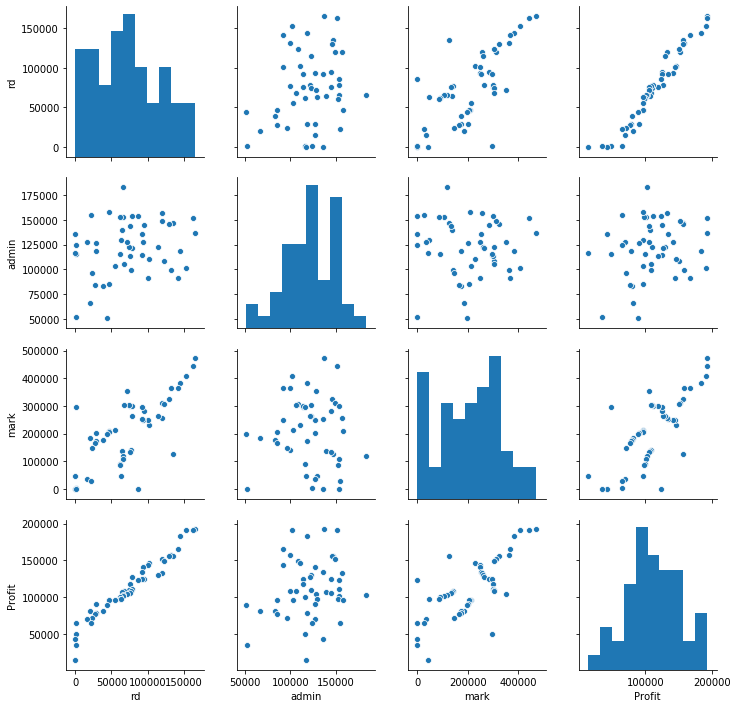

In [11]:
# Scatter plot between the variables along with histograms
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(start_up)
plt.show()

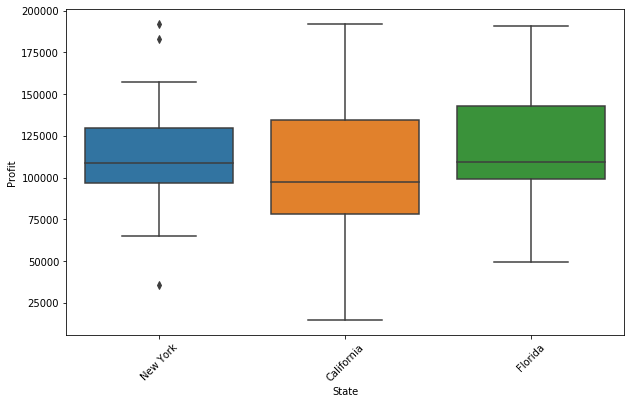

In [13]:
#Let's visualize the categorical varibles
plt.figure(figsize = (10,6))
sns.boxplot(x='State',y='Profit',data=start_up)

plt.xticks(rotation=45)

plt.show()

In [14]:
# Describe the data
start_up.describe()

,rd,admin,mark,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Data Preparation

In [16]:
#Let's assign dummy values to categorical varibales

dummies = pd.get_dummies(start_up[['State']],drop_first=True)
dummies.head()

,State_Florida,State_New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [17]:
#Let's concat dummies dataframe with original dataframe and drop the original columns

start_up = pd.concat([start_up, dummies], axis = 1)
start_up.head()

,rd,admin,mark,State,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [18]:
# Let's drop the original columns since they are already converted to numeric values.
start_up.drop(['State'], axis = 1, inplace = True)
start_up.head()

,rd,admin,mark,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [19]:
# Renaming the newly added columns
start_up = start_up.rename(columns={'State_Florida':'fl','State_New York':'ny'})
start_up.head()

,rd,admin,mark,Profit,fl,ny
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


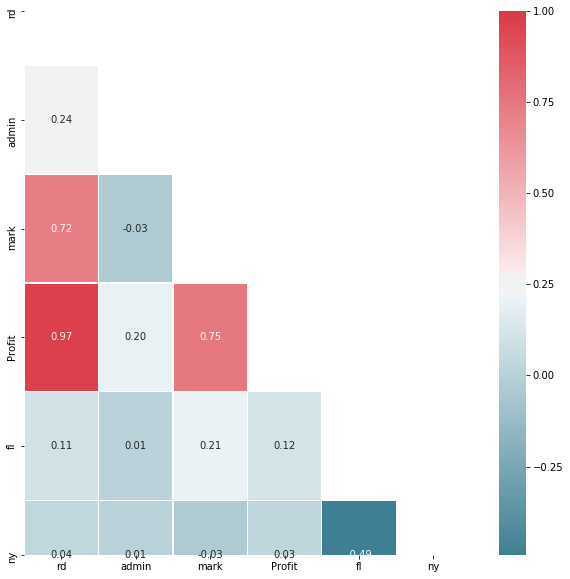

In [21]:
# Finding the correlation among the features

corr = start_up.corr()
fig, ax = plt.subplots(figsize=(10,10))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,cmap = colormap, linewidth=0.2, annot=True,fmt=".2f", mask=dropSelf)

plt.show()

### Building the OLS Model

In [22]:
# Extracting all independent features into a new dataframe
strtup_X = start_up.loc[:, start_up.columns != 'Profit']
strtup_X.head()

,rd,admin,mark,fl,ny
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [23]:
# preparing model considering all the variables using sklearn library
from sklearn.linear_model import LinearRegression

In [25]:
LR1 = LinearRegression()
LR1.fit(strtup_X,start_up.Profit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Getting coefficients of variables   
LR1.coef_

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02,  1.98788793e+02,
       -4.18870191e+01])

In [27]:
LR1.intercept_

50125.34383160419

In [28]:
# Adjusted R^2 value

LR1.score(strtup_X,start_up.Profit)

0.9507524843355148

In [29]:
# Let's predict

pred1 = LR1.predict(strtup_X)

In [30]:
# RMSE
np.sqrt(np.mean((pred1-start_up.Profit)**2)) 

8854.761029414496

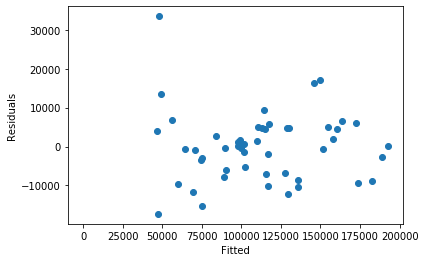

In [31]:
# Residuals Vs Fitted Values

plt.scatter(x=pred1,y=(pred1-start_up.Profit));plt.xlabel("Fitted");plt.ylabel("Residuals");plt.hlines(y=0,xmin=0,xmax=60)

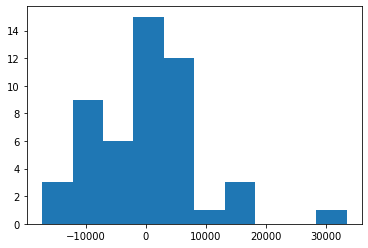

In [32]:
# Checking normal distribution 
plt.hist(pred1-start_up.Profit)
plt.show()

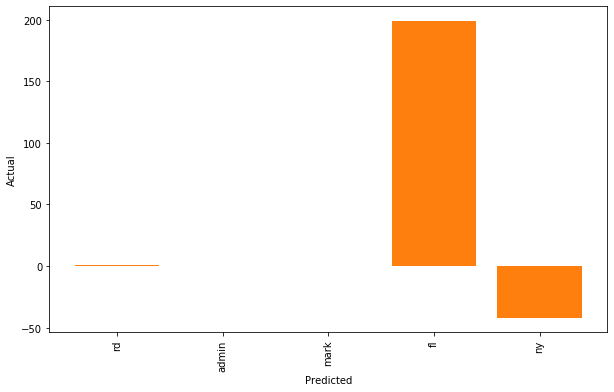

In [34]:
# Predicted Vs Profit
plt.figure(figsize = (10,6))
plt.scatter(x=pred1,y=start_up.Profit);plt.xlabel("Predicted");plt.ylabel("Actual")
plt.bar(height = pd.Series(LR1.coef_),x = strtup_X.columns)
plt.xticks(rotation=90)
plt.show()

### Splitting the dataset

In [35]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(start_up,test_size=0.2)

In [36]:
train.head()

,rd,admin,mark,Profit,fl,ny
18,91749.16,114175.79,294919.57,124266.90,1,0
29,65605.48,153032.06,107138.38,101004.64,0,1
39,38558.51,82982.09,174999.30,81005.76,0,0
15,114523.61,122616.84,261776.23,129917.04,0,1
0,165349.20,136897.80,471784.10,192261.83,0,1


In [37]:
test.head()

,rd,admin,mark,Profit,fl,ny
38,20229.59,65947.93,185265.10,81229.06,0,1
33,55493.95,103057.49,214634.81,96778.92,1,0
11,100671.96,91790.61,249744.55,144259.40,0,0
20,76253.86,113867.30,298664.47,118474.03,0,0
35,46014.02,85047.44,205517.64,96479.51,0,1


### Building Ridge Regression Model

In [38]:
train_X = train.loc[:, train.columns != 'Profit']
train_X.shape

(40, 5)

In [39]:
test_X = test.loc[:, test.columns != 'Profit']
test_X.shape

(10, 5)

In [40]:
# Preparing Ridge regression model for getting better weights on independent variables 
from sklearn.linear_model import Ridge

In [41]:
RM1 = Ridge(alpha = 0.4,normalize=True)
RM1.fit(train_X,train.Profit)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [42]:
# Coefficient values for all the independent variables
print(RM1.coef_)
print(RM1.intercept_)

[5.00792610e-01 1.07791504e-01 7.69669795e-02 6.89403053e+02
 1.25557067e+03]
44642.314175990556


In [43]:
#Predictions
pred_RM1 = RM1.predict(train_X)

In [44]:
# Adjusted R-Squared value 
RM1.score(train_X,train.Profit)

0.8924223030437068

In [45]:
# RMSE
np.sqrt(np.mean((pred_RM1-train.Profit)**2))

13599.326119986179

Running a Ridge Regressor of set of alpha values and observing how the R-Squared, train_rmse and test_rmse are changing with change in alpha values

In [46]:
train_rmse = []
test_rmse = []
R_sqrd = []
alphas = np.arange(0,20,0.05)
for i in alphas:
    RM = Ridge(alpha = i,normalize=True)
    RM.fit(train_X,train.Profit)
    R_sqrd.append(RM.score(train_X,train.Profit))
    train_rmse.append(np.sqrt(np.mean((RM.predict(train_X) - train.Profit)**2)))
    test_rmse.append(np.sqrt(np.mean((RM.predict(test_X) - test.Profit)**2)))

### Plotting RMSE, R_Squared values with respect to alpha values

Text(0, 0.5, 'R_Squared')

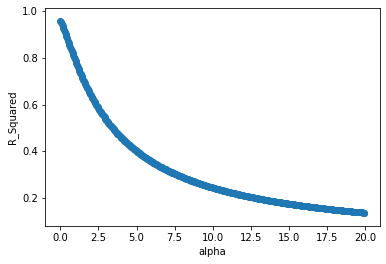

In [47]:
# Alpha vs R_Squared values
plt.scatter(x=alphas,y=R_sqrd);plt.xlabel("alpha");plt.ylabel("R_Squared")

Text(0, 0.5, 'train_rmse')

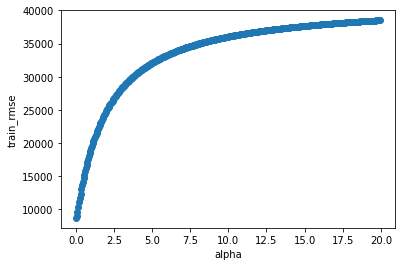

In [48]:
# Alpha vs train rmse
plt.scatter(x=alphas,y=train_rmse);plt.xlabel("alpha");plt.ylabel("train_rmse")

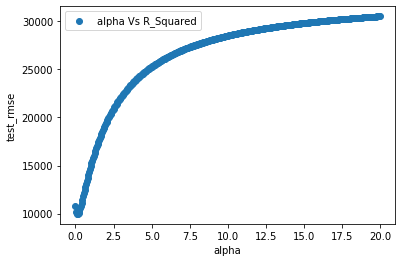

In [49]:
# Alpha vs test rmse
plt.scatter(x=alphas,y=test_rmse);plt.xlabel("alpha");plt.ylabel("test_rmse")
plt.legend(("alpha Vs R_Squared","alpha Vs train_rmse","alpha Vs test_rmse"))

We got maximum R_Squared value at small alpha values

### Building Lasso Regression Model

In [51]:
from sklearn.linear_model import Lasso
LassoM1 = Lasso(alpha = 0.01,normalize=True)
LassoM1.fit(train_X,train.Profit)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
# Coefficient values for all the independent variables
print(LassoM1.coef_)
print(LassoM1.intercept_)

[ 8.20390204e-01  3.67491122e-02  2.25015732e-02  2.05460875e+03
 -1.06722079e+03]
41721.390449528306


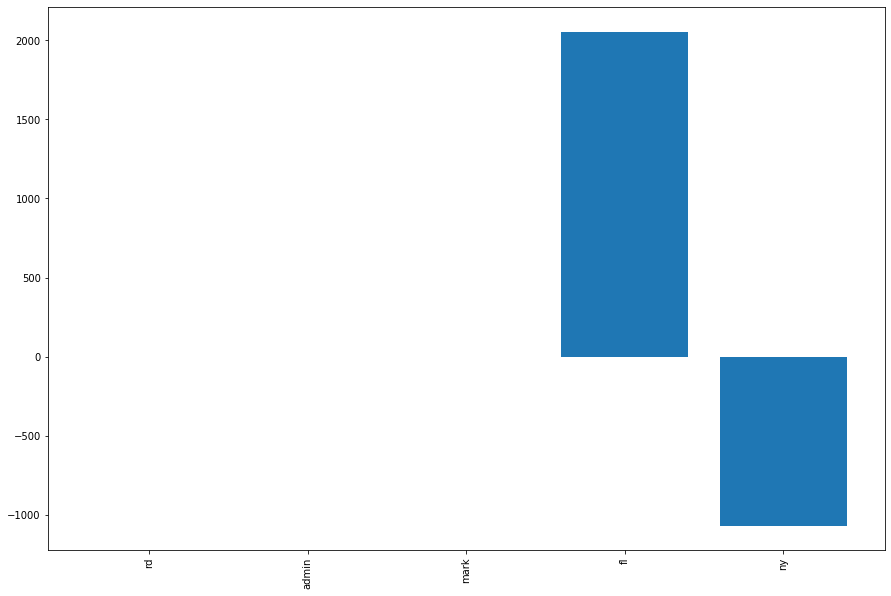

In [53]:
plt.figure(figsize = (15,10))
plt.bar(height = pd.Series(LassoM1.coef_),x=pd.Series(strtup_X.columns))
plt.xticks(rotation=90)
plt.show()

In [54]:
#Predictions
pred_LassoM1 = LassoM1.predict(train_X)

In [55]:
# Adjusted R-Squared value 
LassoM1.score(train_X,train.Profit)

0.9558981707118261

In [56]:
# RMSE
np.sqrt(np.mean((pred_LassoM1-train.Profit)**2))

8707.32127898486

In [57]:
### Running a LASSO Regressor of set of alpha values and observing how the R-Squared, train_rmse and test_rmse are changing with change in alpha values
train_rmse = []
test_rmse = []
R_sqrd = []
alphas = np.arange(0,20,0.05)
for i in alphas:
    LRM = Lasso(alpha = i,normalize=True,max_iter=500)
    LRM.fit(train_X,train.Profit)
    R_sqrd.append(LRM.score(train_X,train.Profit))
    train_rmse.append(np.sqrt(np.mean((LRM.predict(train_X) - train.Profit)**2)))
    test_rmse.append(np.sqrt(np.mean((LRM.predict(test_X) - test.Profit)**2)))

### Plotting RMSE & R_Squared values with respect to alpha values

Text(0, 0.5, 'R_Squared')

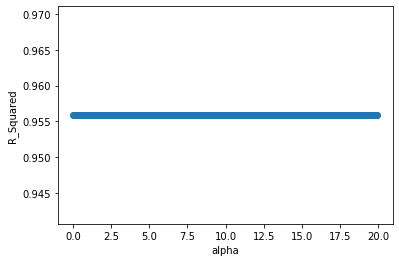

In [65]:
# Alpha vs R_Squared values
plt.scatter(x=alphas,y=R_sqrd);plt.xlabel("alpha");plt.ylabel("R_Squared")

Text(0, 0.5, 'train_rmse')

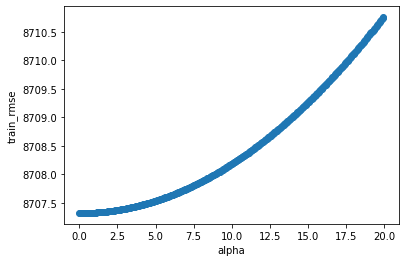

In [66]:
# Alpha vs train rmse
plt.scatter(x=alphas,y=train_rmse);plt.xlabel("alpha");plt.ylabel("train_rmse")

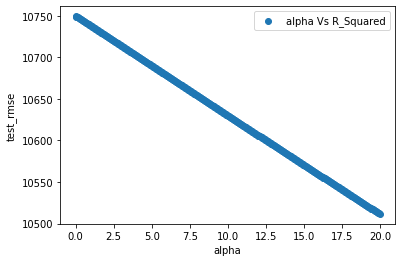

In [68]:
# Alpha vs test rmse
plt.scatter(x=alphas,y=test_rmse);plt.xlabel("alpha");plt.ylabel("test_rmse")
plt.legend(("alpha Vs R_Squared","alpha Vs train_rmse","alpha Vs test_rmse"))
plt.show()

### Conclusion

    - We got maximum R_Squared value at small alpha values for Lasso Regression compared to Ridge and OLS. 
      But R^2 is still high with high alpha values.

    - The errors are high in the case of Lasso and Ridge regression comapred to OLS regression.

    - It indicates that OLS regression is better model than Lasso and Ridge for this problem statement. 